# Using Decision Trees to prepare a model on Fraud Data.

In [25]:
!pip install scikit-learn

In [26]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [27]:
# Read the data

fraud = pd.read_csv("Fraud_check.csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [28]:
# display first 5 rows

fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [29]:
# display last 5 rows

fraud.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [30]:
# information of the data

fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [31]:
# Statistical information of the data

fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [32]:
# Skewness of the data

fraud.skew()

Taxable.Income     0.030015
City.Population    0.125009
Work.Experience    0.018529
dtype: float64

In [33]:
# Kurtosis of the data

fraud.kurt()

Taxable.Income    -1.199782
City.Population   -1.120154
Work.Experience   -1.167524
dtype: float64

In [34]:
# missing values

fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [35]:
# display the column names

fraud.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [36]:
# duplicated values

fraud.duplicated().sum()

0

In [37]:
fraud.value_counts()

Undergrad  Marital.Status  Taxable.Income  City.Population  Work.Experience  Urban
NO         Divorced        10329           140885           7                YES      1
YES        Married         21966           117250           20               YES      1
                           26679           79683            26               NO       1
                           26741           176050           20               NO       1
                           26793           162777           7                NO       1
                                                                                     ..
NO         Single          22054           91889            16               NO       1
                           22258           63622            17               NO       1
                           23884           111105           8                YES      1
                           24557           32450            19               YES      1
YES        Single          99619     

In [38]:
# number of rows and columns

fraud.shape


(600, 6)

In [39]:
# Relationship between the variables

fraud.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [40]:
features = ["Undergrad","Marital.Status","Taxable.Income","City.Population","Work.Experience","urban"]
features

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'urban']

# Visualisations

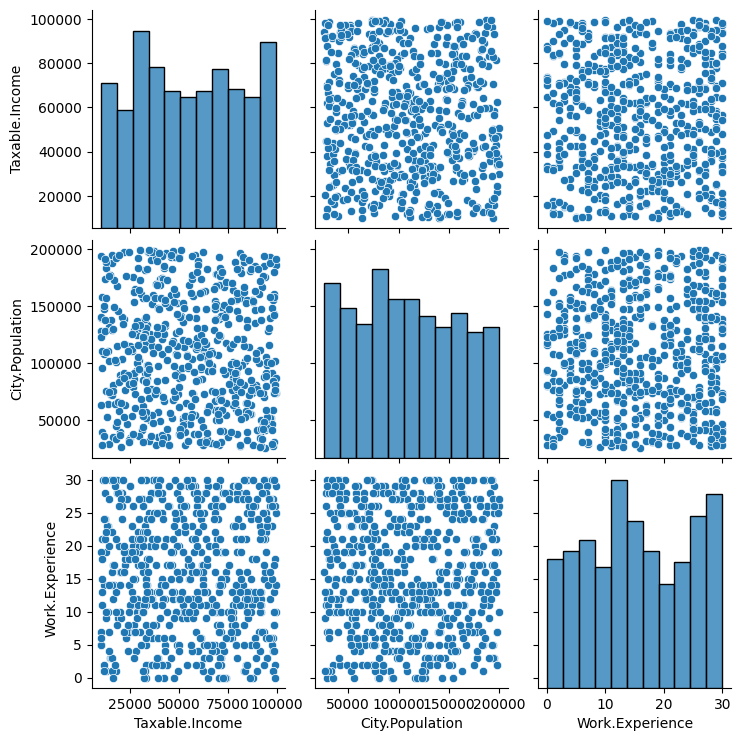

In [41]:
sns.pairplot(fraud)

In [42]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable

fraud=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [43]:
fraud

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [44]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good

fraud["TaxInc"]=pd.cut(fraud["Taxable.Income"],bins=[10002,30000,99620],labels=["Risky","Good"])

In [45]:
fraud["TaxInc"]

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxInc, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [46]:
fraud = pd.get_dummies(fraud,columns = ["TaxInc"],drop_first=True)

<Axes: >

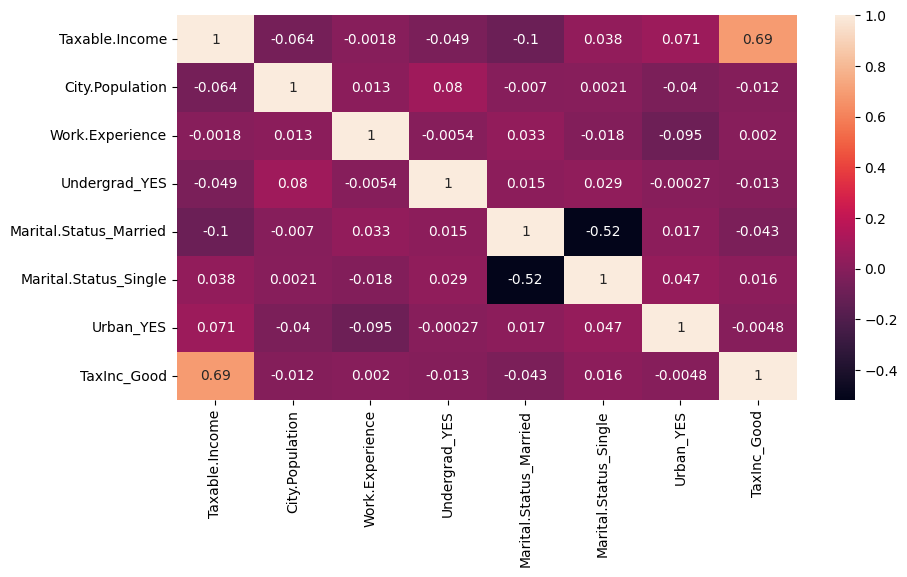

In [48]:
# Heatmap

plt.figure(figsize=(10,5))
sns.heatmap(fraud.corr(),annot=True)

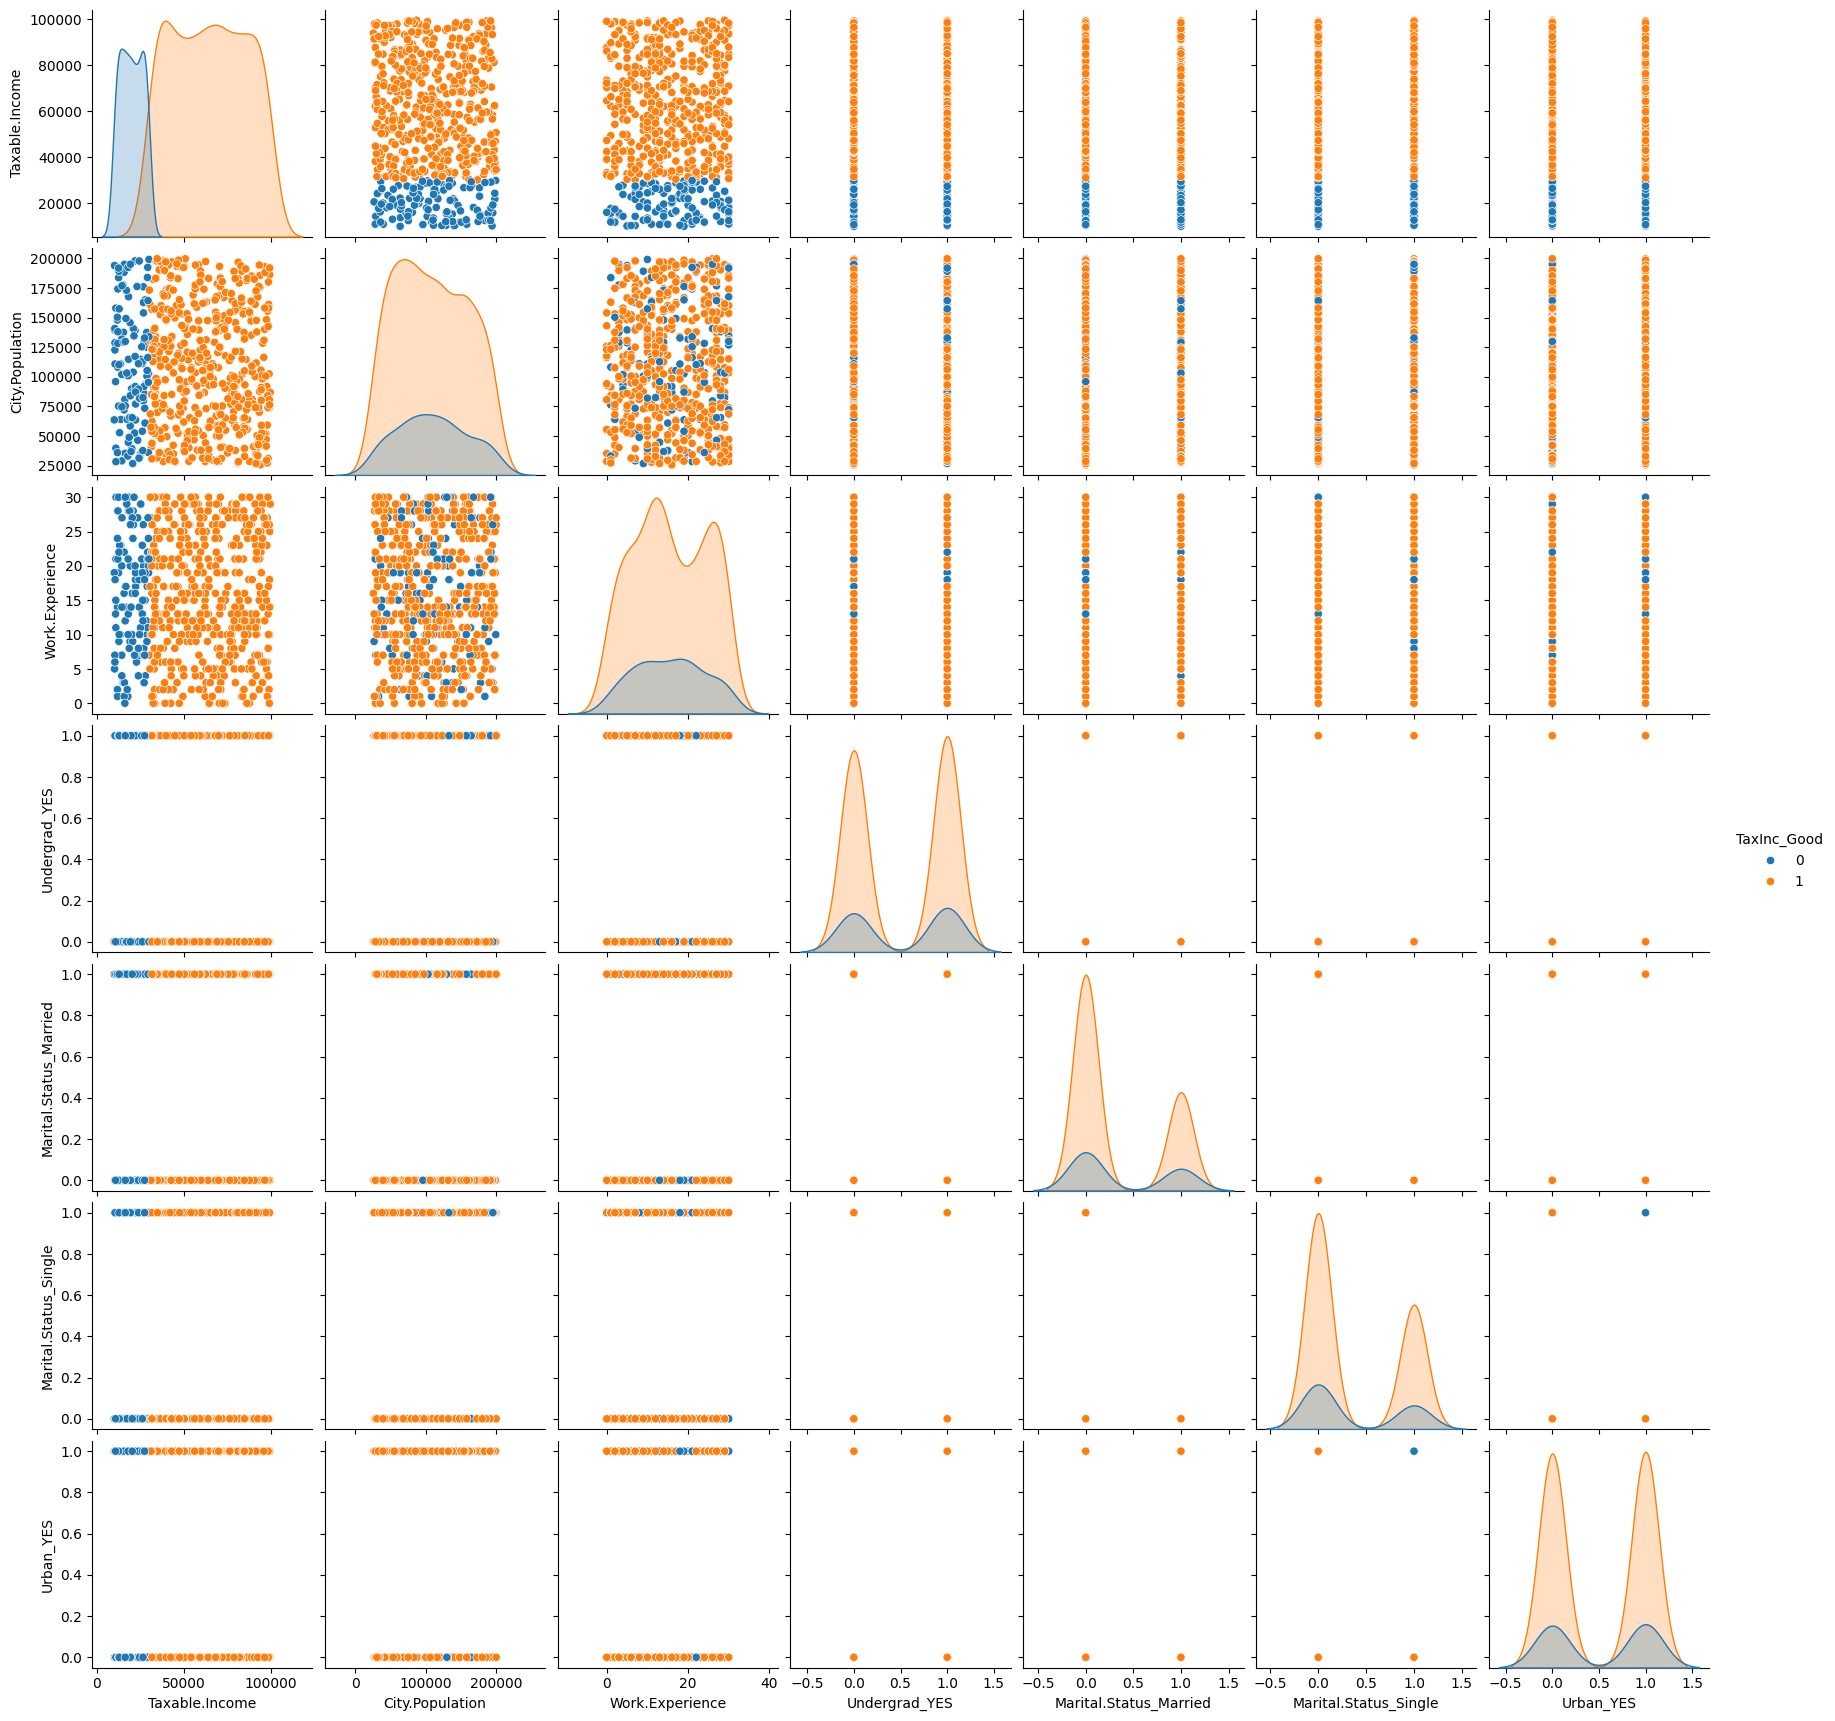

In [51]:
# pairplot to visualize all attributes

sns.pairplot(fraud,hue = "TaxInc_Good")


In [52]:
# Normalize the function

def norm_func(i):
    x=(i-i.min()/(i.max()-i.min()))
    return(x)

In [53]:
# Normalized data frame (considering the numerical part of data)

df_norm = norm_func(fraud.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,85194.851844,14.0,0.0,1.0,0.0,1.0,1.0
591,132858.851844,18.0,1.0,0.0,1.0,1.0,0.0
592,75142.851844,16.0,1.0,0.0,1.0,0.0,1.0
593,131962.851844,10.0,0.0,0.0,0.0,1.0,1.0
594,97525.851844,9.0,0.0,1.0,0.0,1.0,1.0
595,39491.851844,7.0,1.0,0.0,0.0,1.0,1.0
596,55368.851844,2.0,1.0,0.0,0.0,1.0,1.0
597,154057.851844,0.0,0.0,0.0,0.0,1.0,1.0
598,180082.851844,17.0,1.0,1.0,0.0,0.0,1.0
599,158136.851844,16.0,0.0,0.0,0.0,0.0,1.0


In [54]:
# Independent and dependent features

x=df_norm.drop(["TaxInc_Good"],axis=1)
y=df_norm["TaxInc_Good"]

In [55]:
x

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,50046.851844,10.0,0.0,0.0,1.0,1.0
1,134074.851844,18.0,1.0,0.0,0.0,1.0
2,160204.851844,30.0,0.0,1.0,0.0,1.0
3,193263.851844,15.0,1.0,0.0,1.0,1.0
4,27532.851844,28.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
595,39491.851844,7.0,1.0,0.0,0.0,1.0
596,55368.851844,2.0,1.0,0.0,0.0,1.0
597,154057.851844,0.0,0.0,0.0,0.0,1.0
598,180082.851844,17.0,1.0,1.0,0.0,0.0


In [56]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
595    1.0
596    1.0
597    1.0
598    1.0
599    1.0
Name: TaxInc_Good, Length: 600, dtype: float64

In [57]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier


In [58]:
# Train and test the data

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)


In [59]:
df_norm["income"]="<30000"
df_norm.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"


In [60]:
# Drop the taxable income variable

fraud.drop(["Taxable.Income"],axis=1,inplace=True)

In [61]:
## As we are getting error as "ValueError: could not convert string to float: 'YES'".
## Model.fit doesnt not consider String. So, we encode

fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)


In [62]:
fraud.head()

,population,experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,50047,10,0,0,1,1,1
1,134075,18,1,0,0,1,1
2,160205,30,0,1,0,1,1
3,193264,15,1,0,1,1,1
4,27533,28,0,1,0,0,1


In [63]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud[column_name].dtype == object:
        fraud[column_name] = le.fit_transform(fraud[column_name])
    else:
        pass

In [64]:
# Splitting the data into Features and labels

features=fraud.iloc[:,0:5]
labels=fraud.iloc[:,5]

In [65]:
features

,population,experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single
0,50047,10,0,0,1
1,134075,18,1,0,0
2,160205,30,0,1,0
3,193264,15,1,0,1
4,27533,28,0,1,0
...,...,...,...,...,...
595,39492,7,1,0,0
596,55369,2,1,0,0
597,154058,0,0,0,0
598,180083,17,1,1,0


In [66]:
labels

0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: Urban_YES, Length: 600, dtype: uint8

In [67]:
# Collecting the column names

colnames=list(fraud.columns)
predictiors=colnames[0:5]
target=colnames[5]


In [68]:
#  training and testing the data

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,labels,test_size=0.3,random_state=40)


# Model Building

In [69]:
from sklearn.ensemble import RandomForestClassifier as RF
model=RF(n_jobs=3,n_estimators=15,oob_score=True,criterion="entropy")
model.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [70]:
model.estimators_
model.classes_
model.n_classes_

2

In [71]:
model.oob_score_

0.4976190476190476

In [72]:
print(model.oob_score_.mean()*100)

49.76190476190476


In [73]:
# predict the training data

prediction = model.predict(xtrain)

In [74]:
prediction

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,

# Model validation

In [75]:
#  accuracy score

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(ytrain,prediction)
print(accuracy.mean()*100)

99.28571428571429


In [76]:
np.mean(prediction==ytrain)

0.9928571428571429

In [78]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(ytrain,prediction)
print(confusion)

[[208   2]
 [  1 209]]


In [79]:
# prediction test data

pred_test = model.predict(xtest)
print(pred_test)

[1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1
 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1
 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1
 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1]


In [80]:
# Accuracy score

acc_test=accuracy_score(ytest,pred_test)
print(acc_test.mean()*100)

54.44444444444444


In [81]:
# to build decision tree classifier using entropy criteria

model=DecisionTreeClassifier(criterion="entropy",max_depth=4)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

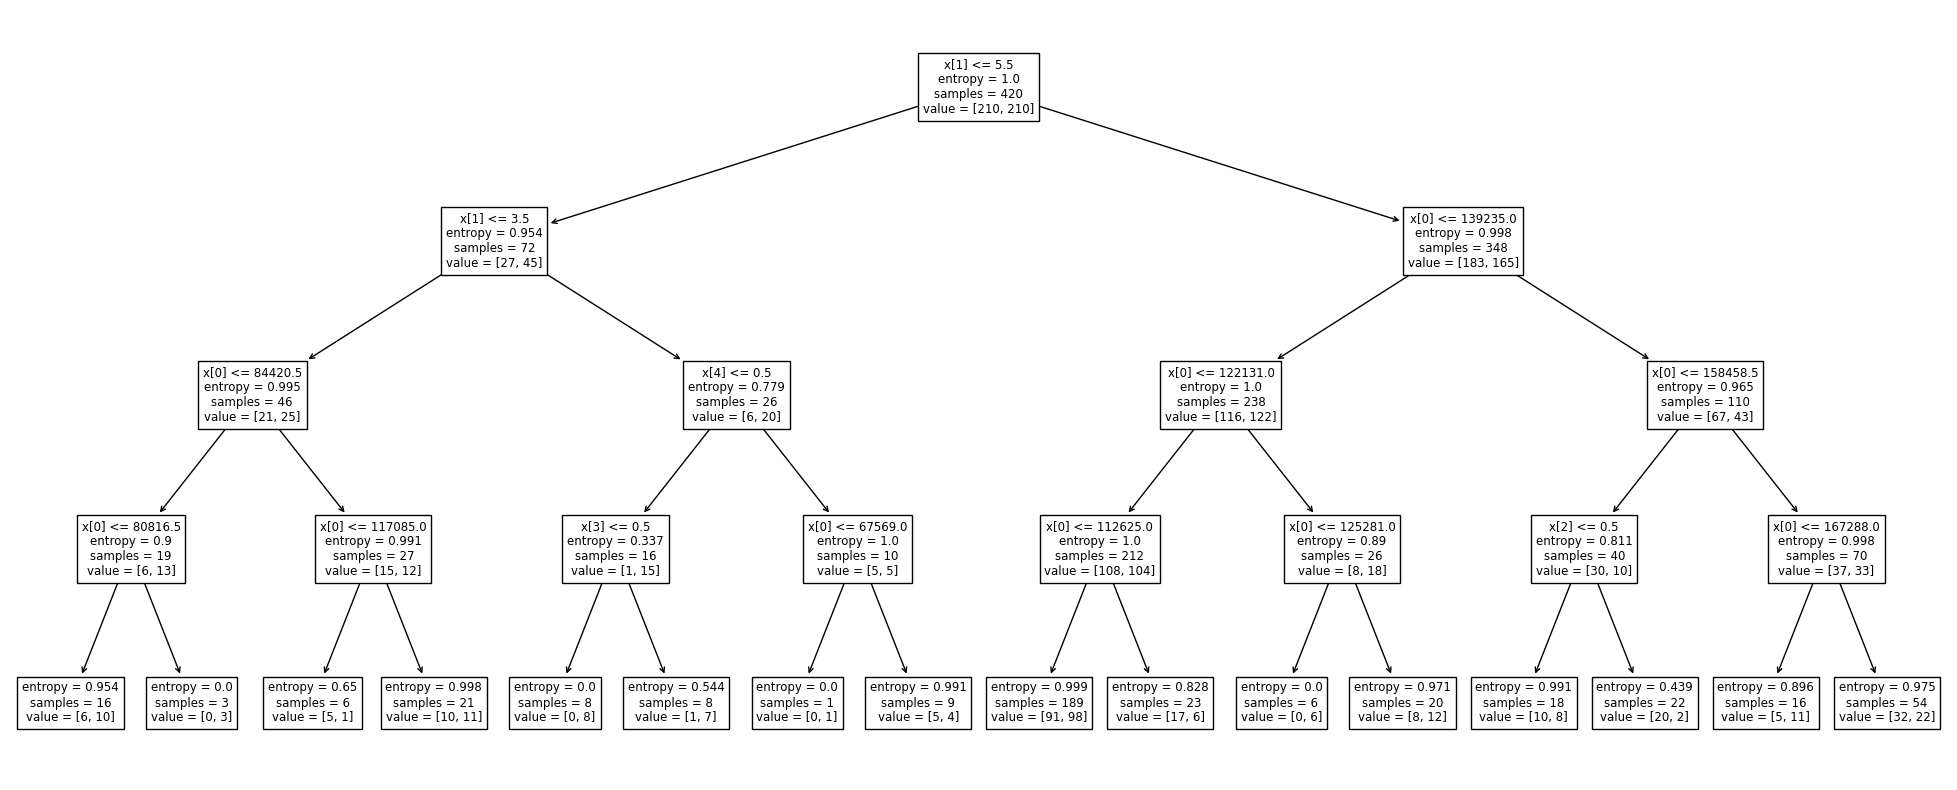

In [82]:
# display the tree

plt.figure(figsize=(25,10))
from sklearn import tree
tree.plot_tree(model);

In [85]:
colnames=list(fraud.columns)


In [86]:
colnames

['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

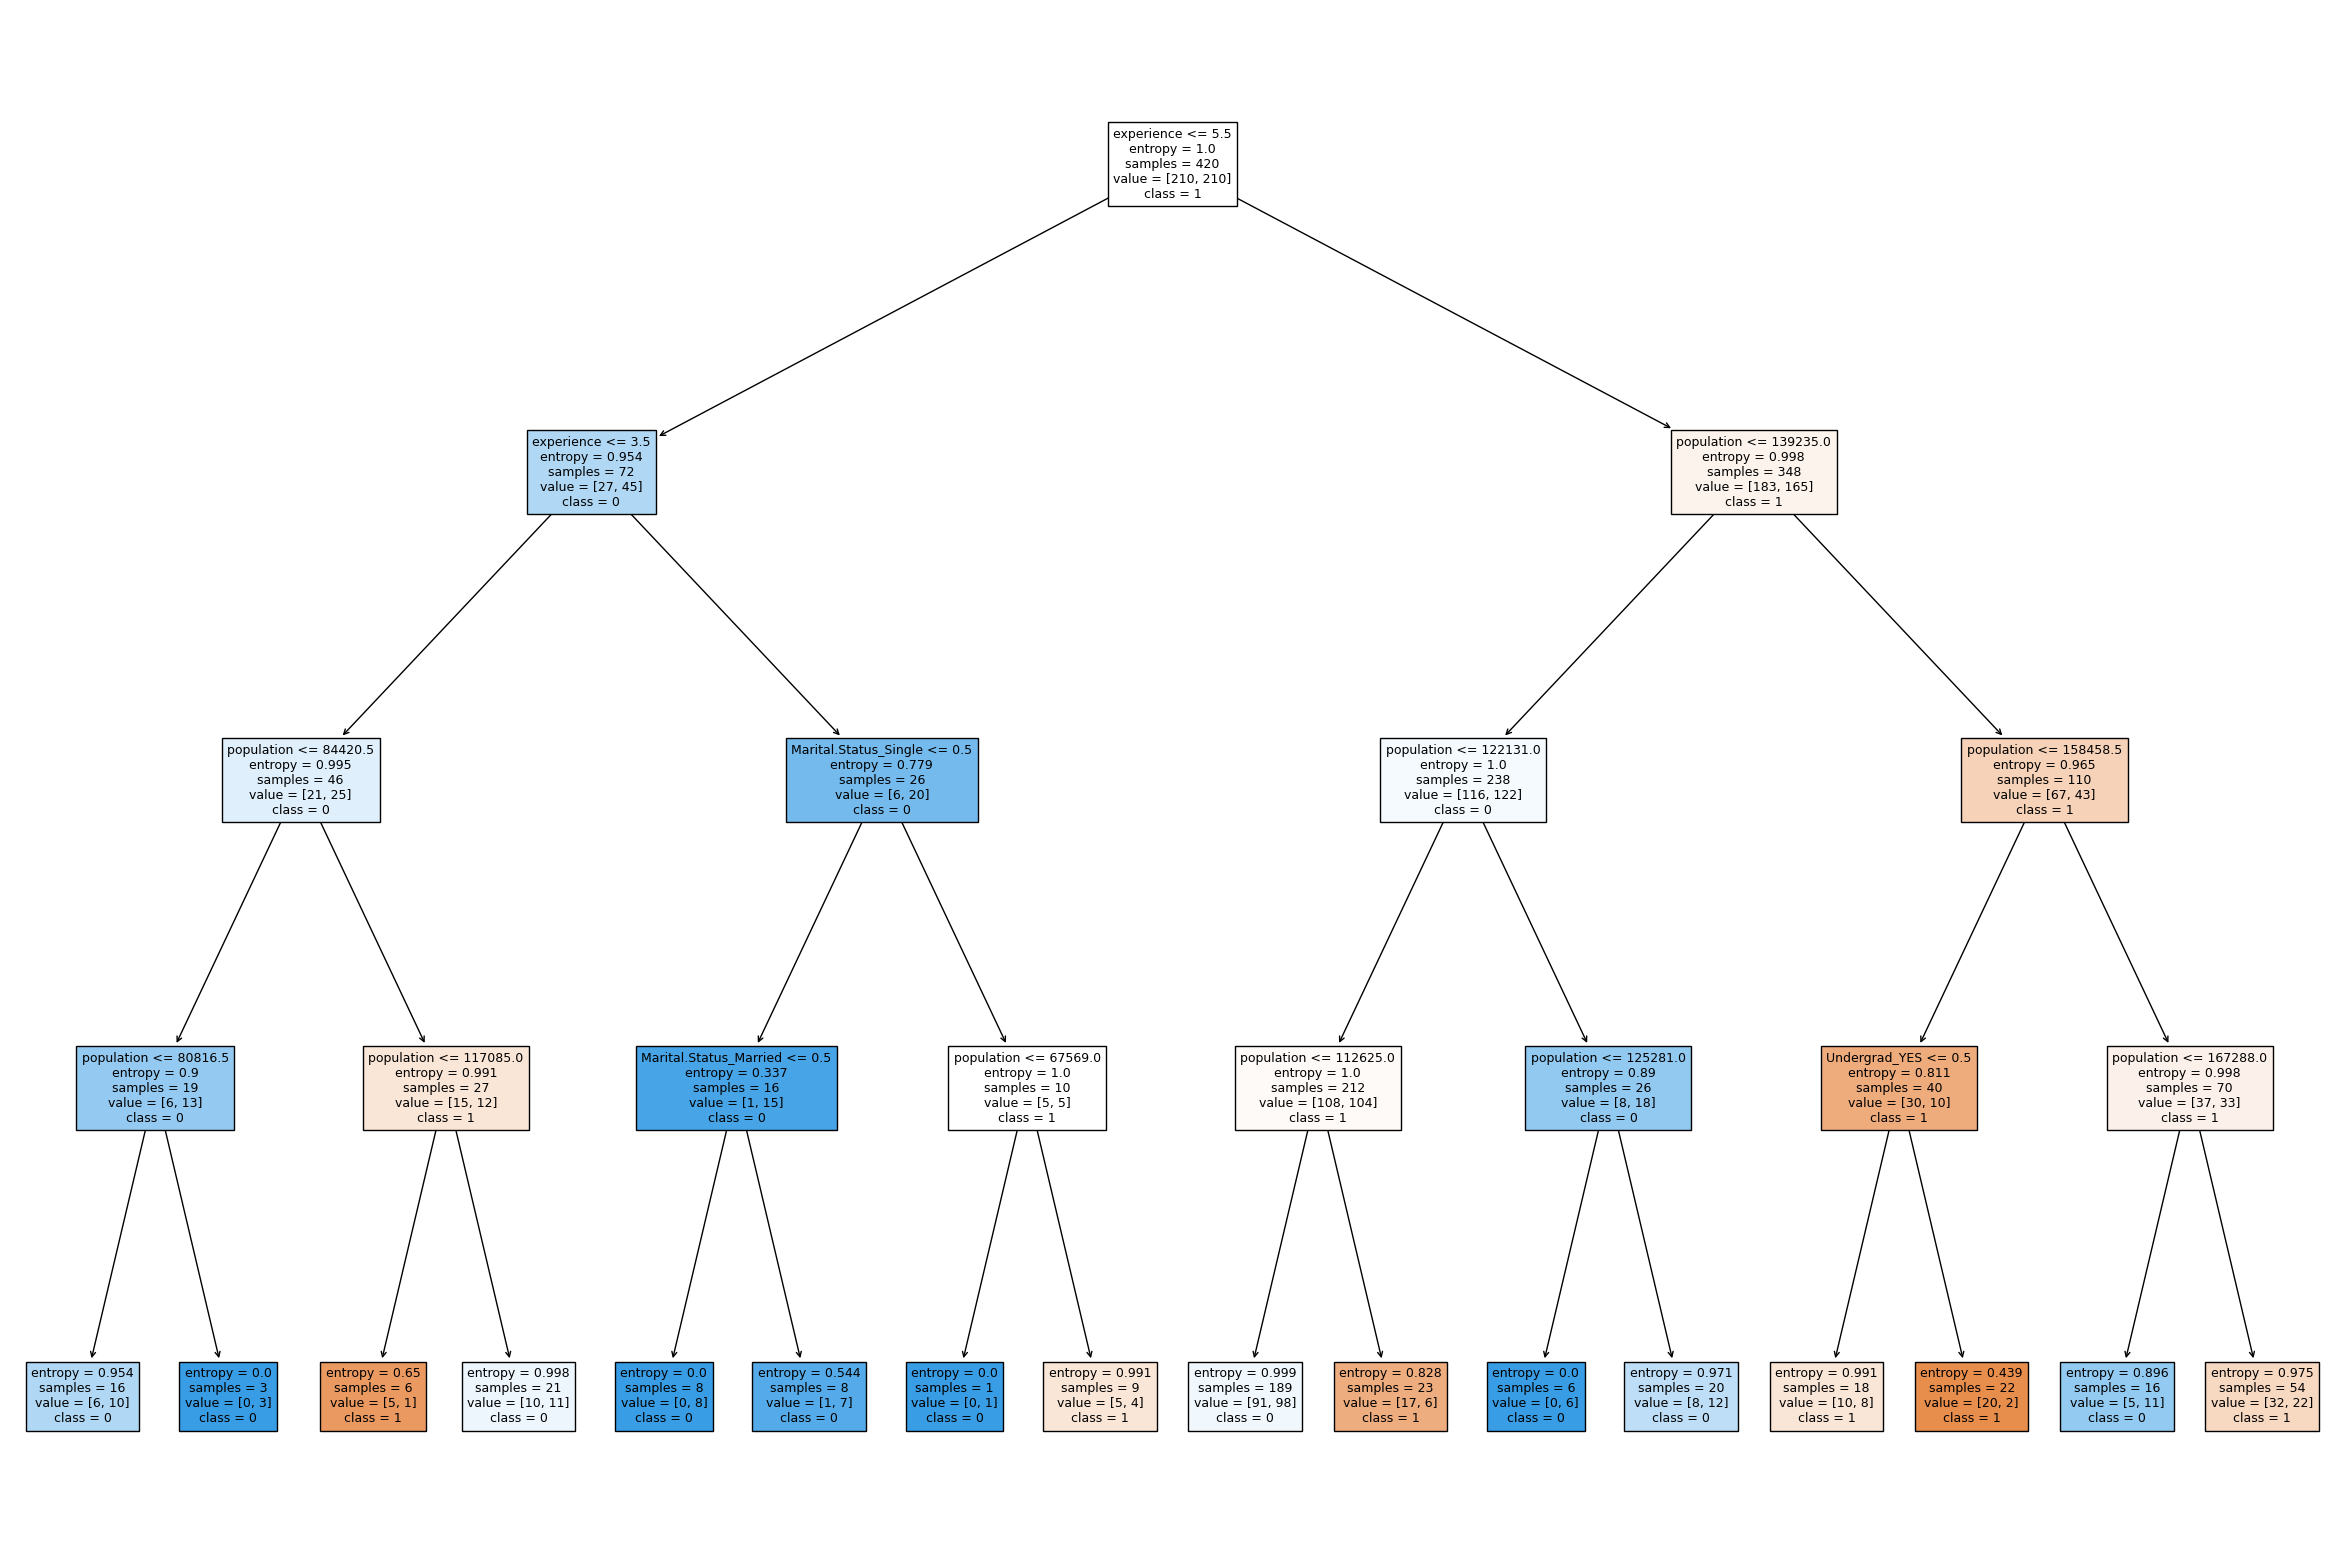

In [87]:
plt.figure(figsize=(30,20))
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=["1","0"]
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True,fontsize=9);


In [88]:
#Predicting on the test data

preds=model.predict(xtest)
pd.Series(preds).value_counts()
preds

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1], dtype=uint8)

In [89]:
# getting the 2 way table to understand the correct and wrong predictions

pd.crosstab(ytest,preds)

col_0,0,1
Urban_YES,,
0,27,61
1,29,63


In [91]:
# Accuracy Score

np.mean(preds==ytest)

0.5

In [92]:
# Building Decision tree classifier (CART) using Gini criteria

from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion="gini",max_depth=4)
model_gini.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=4)

In [93]:
# Predicting and computing the accuracy

pred2=model.predict(xtest)
pd.Series(pred2).value_counts()


1    124
0     56
dtype: int64

In [94]:
pred2

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1], dtype=uint8)

In [95]:
pd.crosstab(ytest,pred2)

col_0,0,1
Urban_YES,,
0,27,61
1,29,63


In [97]:
np.mean(pred2==ytest)

0.5